In [1]:
import numpy as np
import pandas as pd
import sympy as sy
import matplotlib.pyplot as plt
%matplotlib inline
import mpl_toolkits
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv('C:/Users/Raj/Desktop/NCPL/Project/Project 4/go_track_tracks.csv', index_col = 0)

In [3]:
data.head()

,id_android,speed,time,distance,rating,rating_bus,rating_weather,car_or_bus,linha
id,,,,,,,,,
1,0,19.210586,0.138049,2.652,3,0,0,1,NaN
2,0,30.848229,0.171485,5.290,3,0,0,1,NaN
3,1,13.560101,0.067699,0.918,3,0,0,2,NaN
4,1,19.766679,0.389544,7.700,3,0,0,2,NaN
8,0,25.807401,0.154801,3.995,2,0,0,1,NaN


In [4]:
data.shape

(163, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 163 entries, 1 to 38092
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_android      163 non-null    int64  
 1   speed           163 non-null    float64
 2   time            163 non-null    float64
 3   distance        163 non-null    float64
 4   rating          163 non-null    int64  
 5   rating_bus      163 non-null    int64  
 6   rating_weather  163 non-null    int64  
 7   car_or_bus      163 non-null    int64  
 8   linha           80 non-null     object 
dtypes: float64(3), int64(5), object(1)
memory usage: 12.7+ KB


In [6]:
data = data[['id_android', 'speed', 'time', 'distance', 'rating', 'rating_bus', 'rating_weather', 'car_or_bus']]

In [7]:
data = data.reset_index(drop = True)

In [8]:
data.head()

,id_android,speed,time,distance,rating,rating_bus,rating_weather,car_or_bus
0,0,19.210586,0.138049,2.652,3,0,0,1
1,0,30.848229,0.171485,5.290,3,0,0,1
2,1,13.560101,0.067699,0.918,3,0,0,2
3,1,19.766679,0.389544,7.700,3,0,0,2
4,0,25.807401,0.154801,3.995,2,0,0,1


In [9]:
data.describe()

,id_android,speed,time,distance,rating,rating_bus,rating_weather,car_or_bus
count,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
mean,7.386503,16.704738,0.264272,5.302411,2.515337,0.386503,0.515337,1.466258
std,7.348742,16.016168,0.292731,7.639011,0.679105,0.687859,0.841485,0.500397
min,0.000000,0.009779,0.002175,0.001000,1.000000,0.000000,0.000000,1.000000
25%,1.000000,1.591016,0.035978,0.034500,2.000000,0.000000,0.000000,1.000000
50%,4.000000,16.685368,0.214466,3.995000,3.000000,0.000000,0.000000,1.000000
75%,10.000000,23.915760,0.390572,7.333000,3.000000,1.000000,1.000000,2.000000
max,27.000000,96.206029,1.942948,55.770000,3.000000,3.000000,2.000000,2.000000


In [10]:
data = data.drop_duplicates(subset = None, keep = 'first', inplace = False)

In [11]:
data.rename(columns = {'id_android' : 'user'}, inplace = True)
data.drop_duplicates()

,user,speed,time,distance,rating,rating_bus,rating_weather,car_or_bus
0,0,19.210586,0.138049,2.652,3,0,0,1
1,0,30.848229,0.171485,5.290,3,0,0,1
2,1,13.560101,0.067699,0.918,3,0,0,2
3,1,19.766679,0.389544,7.700,3,0,0,2
4,0,25.807401,0.154801,3.995,2,0,0,1
...,...,...,...,...,...,...,...,...
158,24,30.051732,0.218756,6.574,2,0,0,1
159,24,30.173788,0.255387,7.706,3,0,0,1
160,25,1.153772,0.013001,0.015,1,3,2,2
161,26,0.843223,0.007116,0.006,3,1,2,2


In [12]:
total = data.groupby(['car_or_bus'])['user'].count().reset_index()
total = total.sort_values(by = ['car_or_bus', 'user'], ascending = True)
total

,car_or_bus,user
0,1,76
1,2,70


# Select features (X) and target variable (y)

In [13]:
X = data[['speed', 'distance']]
y = data['rating']

# Split the data into training and testing sets

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model

In [15]:
model = LinearRegression()

# Fit the model to the training data

In [16]:
model.fit(X_train, y_train)

LinearRegression()

# Make predictions on the test set

In [17]:
y_pred = model.predict(X_test)

# Evaluate the model

In [18]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.37275986502107455


# Print the coefficients and intercept

In [19]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [0.00352596 0.00272116]
Intercept: 2.449254145883765


# Visualize the linear regression model with a scatter plot

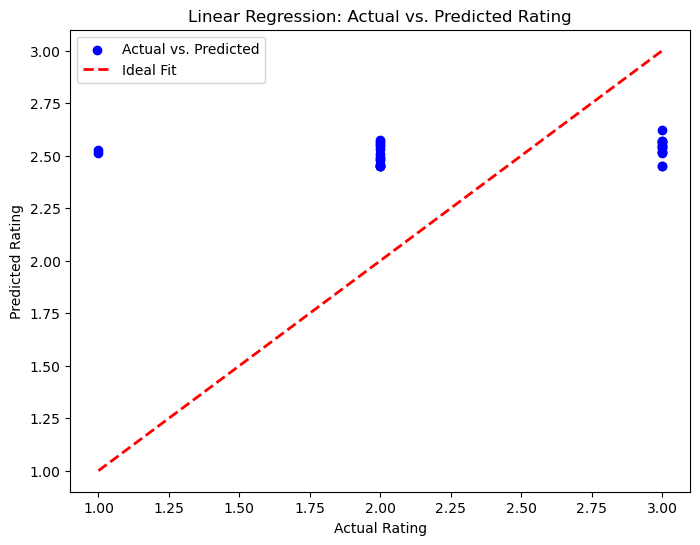

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', marker='o', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Linear Regression: Actual vs. Predicted Rating')
plt.legend()
plt.show()